In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [6]:
type(data)


dict

In [7]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10539,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953522e+07,1.953522e+07,False,NaN,1,NaN,NaN,None,2023-11-07T01:41:00.000Z,34900.110194,1.267668e+10,0.7920,0.032463,-0.229834,1.238319,24.619223,32.626190,17.016326,6.817815e+11,51.4042,7.329023e+11,None,2023-11-07T01:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:41:33.745561
1,1027,Ethereum,ETH,ethereum,7727,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202692e+08,1.202692e+08,True,NaN,2,NaN,NaN,None,2023-11-07T01:41:00.000Z,1890.573233,8.320743e+09,-6.6506,0.065437,-0.098186,4.417291,15.368182,14.539679,1.729961,2.273777e+11,17.1436,2.273777e+11,None,2023-11-07T01:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:41:33.745561
2,825,Tether USDt,USDT,tether,65172,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.539226e+10,8.862366e+10,True,NaN,3,NaN,NaN,None,2023-11-07T01:40:00.000Z,1.000242,2.944742e+10,5.8668,-0.037072,-0.061315,-0.027067,-0.019692,0.070486,0.056038,8.541295e+10,6.4375,8.864513e+10,None,2023-11-07T01:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-06 17:41:33.745561
3,1839,BNB,BNB,bnb,1746,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517027e+08,1.517027e+08,False,NaN,4,NaN,NaN,None,2023-11-07T01:40:00.000Z,251.610435,5.361183e+08,24.8827,-0.429921,2.758533,10.168914,18.530963,15.659465,2.899632,3.816998e+10,2.8779,3.816998e+10,None,2023-11-07T01:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:41:33.745561
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,None,2023-11-07T01:41:00.000Z,0.686829,3.364036e+09,56.6162,0.355445,0.754324,18.646410,31.421807,35.826566,6.916928,3.682492e+10,2.7765,6.868292e+10,None,2023-11-07T01:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:41:33.745561
5,3408,USDC,USDC,usd-coin,14798,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.444899e+10,2.444899e+10,False,NaN,6,NaN,NaN,None,2023-11-07T01:41:00.000Z,1.000135,3.754160e+09,12.5386,0.019206,0.012242,0.001429,0.009906,0.000952,0.016351,2.445230e+10,1.8446,2.445230e+10,None,2023-11-07T01:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-06 17:41:33.745561
6,5426,Solana,SOL,solana,543,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.206270e+08,5.617715e+08,True,NaN,7,NaN,NaN,None,2023-11-07T01:41:00.000Z,41.423134,1.081148e+09,23.1914,-0.919597,0.058586,15.199487,78.076116,105.940649,69.504395,1.742369e+10,1.3144,2.327034e+10,None,2023-11-07T01:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:41:33.745561
7,2010,Cardano,ADA,cardano,960,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.525858e+10,3.633522e+10,False,NaN,8,NaN,NaN,None,2023-11-07T01:40:00.000Z,0.363345,4.311370e+08,31.6140,0.668699,4.227250,19.801581,40.575982,40.841977,21.702808,1.281104e+10,0.9656,1.635054e+10,None,2023-11-07T01:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:41:33.745561
8,74,Dogecoin,DOGE,dogecoin,821,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.417251e+11,

In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])
    
    if not os.path.isfile(r'C:\Users\Cheryl\OneDrive - Bellevue # 2 Foursquare Church\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\Cheryl\OneDrive - Bellevue # 2 Foursquare Church\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Cheryl\OneDrive - Bellevue # 2 Foursquare Church\Documents\Python Scripts\API.csv', mode='a', header=False)

In [10]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [39]:
df72 = pd.read_csv(r'C:\Users\Cheryl\OneDrive - Bellevue # 2 Foursquare Church\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10520,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.953482e+07,1.953482e+07,False,NaN,1,NaN,NaN,NaN,2023-11-06T13:48:00.000Z,34943.512719,1.344596e+10,31.1899,-0.703725,-0.437388,0.508504,25.078264,35.979475,18.980004,6.826152e+11,51.4325,7.338138e+11,NaN,2023-11-06T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 05:48:43.487299
1,1,1027,Ethereum,ETH,ethereum,7714,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202692e+08,1.202692e+08,True,NaN,2,NaN,NaN,NaN,2023-11-06T13:48:00.000Z,1892.037785,8.306490e+09,27.4447,-0.438016,0.251022,3.892628,15.337333,16.121548,3.055366,2.275538e+11,17.1453,2.275538e+11,NaN,2023-11-06T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 05:48:43.487299
2,2,825,Tether USDt,USDT,tether,65153,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.539226e+10,8.862366e+10,True,NaN,3,NaN,NaN,NaN,2023-11-06T13:47:00.000Z,1.000755,2.888848e+10,27.0534,0.026258,0.004031,0.050123,0.019122,0.139353,0.153365,8.545674e+10,6.4471,8.869058e+10,NaN,2023-11-06T13:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-06 05:48:43.487299
3,3,52,XRP,XRP,xrp,1133,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,4,NaN,NaN,NaN,2023-11-06T13:48:00.000Z,0.711230,2.789594e+09,89.3244,-0.496365,10.140130,23.338178,36.134716,42.503293,13.994792,3.813322e+10,2.8732,7.112305e+10,NaN,2023-11-06T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 05:48:43.487299
4,4,1839,BNB,BNB,bnb,1743,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517028e+08,1.517028e+08,False,NaN,5,NaN,NaN,NaN,2023-11-06T13:47:00.000Z,250.448263,4.571035e+08,30.8485,1.530119,3.000286,9.511073,17.599947,16.908202,3.040228,3.799370e+10,2.8627,3.799370e+10,NaN,2023-11-06T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 05:48:43.487299
5,5,3408,USDC,USDC,usd-coin,14795,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.457240e+10,2.457240e+10,False,NaN,6,NaN,NaN,NaN,2023-11-06T13:48:00.000Z,1.000305,3.560189e+09,36.5001,0.023792,0.004765,0.005141,0.041279,0.026271,0.020310,2.457991e+10,1.8544,2.457991e+10,NaN,2023-11-06T13:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-06 05:48:43.487299
6,6,5426,Solana,SOL,solana,541,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.200890e+08,5.617720e+08,True,NaN,7,NaN,NaN,NaN,2023-11-06T13:48:00.000Z,40.074124,9.031674e+08,-0.4357,-1.093180,-3.353616,14.843712,70.973442,105.708193,72.323805,1.683470e+10,1.2701,2.251252e+10,NaN,2023-11-06T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 05:48:43.487299
7,7,2010,Cardano,ADA,cardano,959,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.525862e+10,3.632019e+10,False,NaN,8,NaN,NaN,NaN,2023-11-06T13:47:00.000Z,0.354423,3.342499e+08,38.2095,-0.060144,3.657363,17.815257,37.053421,39.440381,20.855930,1.249645e+10,0.9428,1.594902e+10,NaN,2023-11-06T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 05:48:43.487299
8,8,74,Dogecoin,DOGE,dogecoin,820,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",Na

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10539,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953522e+07,1.953522e+07,False,NaN,1,NaN,NaN,None,2023-11-07T01:42:00.000Z,34905.770162,1.267769e+10,0.7866,0.063118,-0.208870,1.251304,24.644548,32.625992,17.036097,6.818921e+11,51.4126,7.330212e+11,None,2023-11-07T01:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:42:38.249421
1,1027,Ethereum,ETH,ethereum,7727,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202692e+08,1.202692e+08,True,NaN,2,NaN,NaN,None,2023-11-07T01:42:00.000Z,1891.508345,8.321958e+09,-6.6372,0.178253,-0.038434,4.436101,15.442488,14.589461,1.783770,2.274901e+11,17.1521,2.274901e+11,None,2023-11-07T01:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:42:38.249421
2,825,Tether USDt,USDT,tether,65172,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.539226e+10,8.862366e+10,True,NaN,3,NaN,NaN,None,2023-11-07T01:41:00.000Z,1.000384,2.944329e+10,5.8527,0.007076,-0.036672,-0.010870,-0.012526,0.076750,0.074668,8.542508e+10,6.4443,8.865772e+10,None,2023-11-07T01:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-06 17:42:38.249421
3,1839,BNB,BNB,bnb,1746,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517027e+08,1.517027e+08,False,NaN,4,NaN,NaN,None,2023-11-07T01:41:00.000Z,251.456155,5.360216e+08,24.8646,-0.447105,2.736934,10.097510,18.433797,15.589548,2.836691,3.814657e+10,2.8761,3.814657e+10,None,2023-11-07T01:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:42:38.249421
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,None,2023-11-07T01:42:00.000Z,0.686894,3.369506e+09,56.8194,0.520552,0.771436,18.652835,31.436676,35.839270,6.929124,3.682840e+10,2.7767,6.868940e+10,None,2023-11-07T01:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:42:38.249421
5,3408,USDC,USDC,usd-coin,14798,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.444899e+10,2.444899e+10,False,NaN,6,NaN,NaN,None,2023-11-07T01:41:00.000Z,1.000135,3.754160e+09,12.5386,0.019206,0.012242,0.001429,0.009906,0.000952,0.016351,2.445230e+10,1.8446,2.445230e+10,None,2023-11-07T01:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-06 17:42:38.249421
6,5426,Solana,SOL,solana,543,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.206270e+08,5.617715e+08,True,NaN,7,NaN,NaN,None,2023-11-07T01:42:00.000Z,41.418638,1.081976e+09,23.2491,-0.816765,0.064873,15.169785,78.038758,105.914785,69.496257,1.742180e+10,1.3143,2.326781e+10,None,2023-11-07T01:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:42:38.249421
7,2010,Cardano,ADA,cardano,960,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.525858e+10,3.633522e+10,False,NaN,8,NaN,NaN,None,2023-11-07T01:41:00.000Z,0.363174,4.311470e+08,31.6117,0.639325,4.184056,19.740411,40.487484,40.764082,21.654012,1.280499e+10,0.9660,1.634282e+10,None,2023-11-07T01:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-06 17:42:38.249421
8,74,Dogecoin,DOGE,dogecoin,821,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.417251e+11,1

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.063118,-0.208870,1.251304,24.644548,32.625992,17.036097
Ethereum,0.178253,-0.038434,4.436101,15.442488,14.589461,1.783770
Tether USDt,0.007076,-0.036672,-0.010870,-0.012526,0.076750,0.074668
BNB,-0.447105,2.736934,10.097510,18.433797,15.589548,2.836691
XRP,0.520552,0.771436,18.652835,31.436676,35.839270,6.929124
USDC,0.019206,0.012242,0.001429,0.009906,0.000952,0.016351
Solana,-0.816765,0.064873,15.169785,78.038758,105.914785,69.496257
Cardano,0.639325,4.184056,19.740411,40.487484,40.764082,21.654012
Dogecoin,0.010589,3.548131,7.369844,21.912429,17.542927,-0.213064


In [14]:
df4 = df3.stack()
df4


name                                         
Bitcoin          quote.USD.percent_change_1h       0.063118
                 quote.USD.percent_change_24h     -0.208870
                 quote.USD.percent_change_7d       1.251304
                 quote.USD.percent_change_30d     24.644548
                 quote.USD.percent_change_60d     32.625992
                 quote.USD.percent_change_90d     17.036097
Ethereum         quote.USD.percent_change_1h       0.178253
                 quote.USD.percent_change_24h     -0.038434
                 quote.USD.percent_change_7d       4.436101
                 quote.USD.percent_change_30d     15.442488
                 quote.USD.percent_change_60d     14.589461
                 quote.USD.percent_change_90d      1.783770
Tether USDt      quote.USD.percent_change_1h       0.007076
                 quote.USD.percent_change_24h     -0.036672
                 quote.USD.percent_change_7d      -0.010870
                 quote.USD.percent_change_30d     -0.0

In [16]:
type(df4)


pandas.core.series.Series

In [17]:
df5 = df4.to_frame(name='values')
df5


values
name                                                    
Bitcoin         quote.USD.percent_change_1h     0.063118
                quote.USD.percent_change_24h   -0.208870
                quote.USD.percent_change_7d     1.251304
                quote.USD.percent_change_30d   24.644548
                quote.USD.percent_change_60d   32.625992
                quote.USD.percent_change_90d   17.036097
Ethereum        quote.USD.percent_change_1h     0.178253
                quote.USD.percent_change_24h   -0.038434
                quote.USD.percent_change_7d     4.436101
                quote.USD.percent_change_30d   15.442488
                quote.USD.percent_change_60d   14.589461
                quote.USD.percent_change_90d    1.783770
Tether USDt     quote.USD.percent_change_1h     0.007076
                quote.USD.percent_change_24h   -0.036672
                quote.USD.percent_change_7d    -0.010870
                quote.USD.percent_change_30d   -0.012526
                quote.USD.percent_change_60d    0.076750
                quote.USD.percent_change_90d    0.074668
BNB             quote.USD.percent_change_1h    -0.447105
                quote.USD.percent_change_24h    2.736934
                quote.USD.percent_change_7d    10.097510
                quote.USD.percent_change_30d   18.433797
                quote.USD.percent_change_60d   15.589548
                quote.USD.percent_change_90d    2.836691
XRP             quote.USD.percent_change_1h     0.520552
                quote.USD.percent_change_24h    0.771436
                quote.USD.percent_change_7d    18.652835
                quote.USD.percent_change_30d   31.436676
                quote.USD.percent_change_60d   35.839270
                quote.USD.percent_change_90d    6.929124
USDC            quote.USD.percent_change_1h     0.019206
                quote.USD.percent_change_24h    0.012242
                quote.USD.percent_change_7d     0.001429
                quote.USD.percent_change_30d    0.009906
                quote.USD.percent_change_60d    0.000952
                quote.USD.percent_change_90d    0.016351
Solana          quote.USD.percent_change_1h    -0.816765
                quote.USD.percent_change_24h    0.064873
                quote.USD.percent_change_7d    15.169785
                quote.USD.percent_change_30d   78.038758
                quote.USD.percent_change_60d  105.914785
                quote.USD.percent_change_90d   69.496257
Cardano         quote.USD.percent_change_1h     0.639325
                quote.USD.percent_change_24h    4.184056
                quote.USD.percent_change_7d    19.740411
                quote.USD.percent_change_30d   40.487484
                quote.USD.percent_change_60d   40.764082
                quote.USD.percent_change_90d   21.654012
Dogecoin        quote.USD.percent_change_1h     0.010589
                quote.USD.percent_change_24h    3.548131
                quote.USD.percent_change_7d     7.369844
                quote.USD.percent_change_30d   21.912429
                quote.USD.percent_change_60d   17.542927
                quote.USD.percent_change_90d   -0.213064
TRON            quote.USD.percent_change_1h    -0.170037
                quote.USD.percent_change_24h   -0.969333
                quote.USD.percent_change_7d     1.649423
                quote.USD.percent_change_30d   10.370605
                quote.USD.percent_change_60d   22.727513
                quote.USD.percent_change_90d   27.087039
Toncoin         quote.USD.percent_change_1h    -0.191924
                quote.USD.percent_change_24h    6.861634
                quote.USD.percent_change_7d    14.643645
                quote.USD.percent_change_30d   18.216296
                quote.USD.percent_change_60d   35.799068
                quote.USD.percent_change_90d   91.851486
Chainlink       quote.USD.percent_change_1h     0.250942
                quote.USD.percent_change_24h    5.286577
                quote.USD.percent_change_7d    13.660643
   

In [18]:
df5.count()


values    90
dtype: int64

In [19]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.063118
1,Bitcoin,quote.USD.percent_change_24h,-0.208870
2,Bitcoin,quote.USD.percent_change_7d,1.251304
3,Bitcoin,quote.USD.percent_change_30d,24.644548
4,Bitcoin,quote.USD.percent_change_60d,32.625992
5,Bitcoin,quote.USD.percent_change_90d,17.036097
6,Ethereum,quote.USD.percent_change_1h,0.178253
7,Ethereum,quote.USD.percent_change_24h,-0.038434
8,Ethereum,quote.USD.percent_change_7d,4.436101
9,Ethereum,quote.USD.percent_change_30d,15.442488


In [20]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.063118
1,Bitcoin,quote.USD.percent_change_24h,-0.208870
2,Bitcoin,quote.USD.percent_change_7d,1.251304
3,Bitcoin,quote.USD.percent_change_30d,24.644548
4,Bitcoin,quote.USD.percent_change_60d,32.625992
5,Bitcoin,quote.USD.percent_change_90d,17.036097
6,Ethereum,quote.USD.percent_change_1h,0.178253
7,Ethereum,quote.USD.percent_change_24h,-0.038434
8,Ethereum,quote.USD.percent_change_7d,4.436101
9,Ethereum,quote.USD.percent_change_30d,15.442488


In [21]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.063118
1,Bitcoin,24h,-0.208870
2,Bitcoin,7d,1.251304
3,Bitcoin,30d,24.644548
4,Bitcoin,60d,32.625992
5,Bitcoin,90d,17.036097
6,Ethereum,quote.USD.percent_change_1h,0.178253
7,Ethereum,24h,-0.038434
8,Ethereum,7d,4.436101
9,Ethereum,30d,15.442488


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Cheryl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



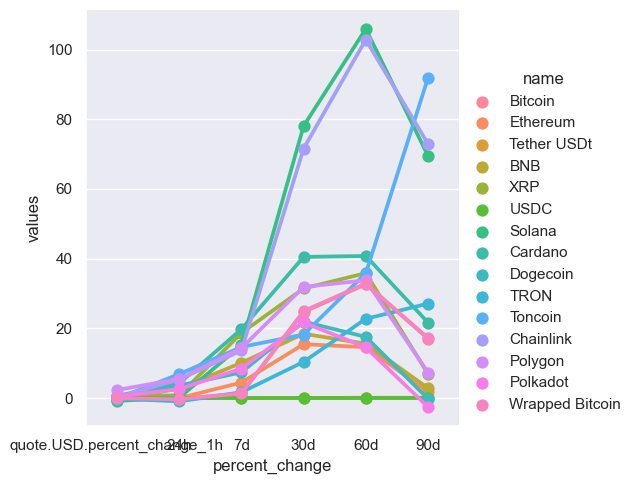

In [110]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [40]:
df10 = df72[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,34943.512719,2023-11-06 05:48:43.487299
15,Bitcoin,34943.512719,2023-11-06 05:48:43.487299
30,Bitcoin,34959.150671,2023-11-06 05:49:44.859628
45,Bitcoin,34959.150671,2023-11-06 05:49:44.859628
60,Bitcoin,35133.036401,2023-11-06 06:09:30.894798
75,Bitcoin,35133.036401,2023-11-06 06:09:30.894798
90,Bitcoin,35130.022936,2023-11-06 06:10:31.838822
105,Bitcoin,35130.022936,2023-11-06 06:10:31.838822
120,Bitcoin,35130.022936,2023-11-06 06:11:33.735702
135,Bitcoin,35130.022936,2023-11-06 06:11:33.735702


In [49]:
df10['Timestamp'] = pd.to_datetime(df10['Timestamp'])
df10['Timestamp'] = pd.to_datetime(df10['Timestamp'], format='%Y-%m-%d %H:%M')

print(df10['Timestamp'].head())

0    2023-11-06 05:48:43.487299
15   2023-11-06 05:48:43.487299
30   2023-11-06 05:49:44.859628
45   2023-11-06 05:49:44.859628
60   2023-11-06 06:09:30.894798
Name: Timestamp, dtype: datetime64[ns]


In [85]:
import plotly.express as px

fig = px.line(df10, x='Timestamp', y='quote.USD.price', title='Bitcoin Price Over Time')
fig.update_xaxes(rangeslider_visible=True)  # Add a range slider for interactivity
fig.show()


In [86]:
import plotly.graph_objs as go

df11 = df72[['name','quote.USD.price','Timestamp']]
df11 = df11.query("name == 'Polygon'")
df11

,name,quote.USD.price,Timestamp
12,Polygon,0.707013,2023-11-06 05:48:43.487299
27,Polygon,0.707013,2023-11-06 05:48:43.487299
42,Polygon,0.707007,2023-11-06 05:49:44.859628
57,Polygon,0.707007,2023-11-06 05:49:44.859628
72,Polygon,0.710037,2023-11-06 06:09:30.894798
87,Polygon,0.710037,2023-11-06 06:09:30.894798
102,Polygon,0.710257,2023-11-06 06:10:31.838822
117,Polygon,0.710257,2023-11-06 06:10:31.838822
132,Polygon,0.710257,2023-11-06 06:11:33.735702
147,Polygon,0.710257,2023-11-06 06:11:33.735702


In [105]:
from ipywidgets import interact, Dropdown

# Create a dropdown menu with the different cryptocurrency names, including default start value
crypto_dropdown = Dropdown(
    options=['--Select Ticker--'] + sorted(df72['name'].unique().tolist()),
    value='--Select Ticker--',
    description='Crypto:',
)

def update_plot(crypto_name):
    if crypto_name == '--Select Ticker--':
        print("Please select a crypto ticker from the dropdown.")
        return
    else:
        df_filtered = df72[df72['name'] == crypto_name]

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df_filtered['Timestamp'], y=df_filtered['quote.USD.price'], mode='lines+markers', name=crypto_name))
        fig.update_layout(
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=1, label="1d", step="day", stepmode="backward"),
                        dict(count=1, label='1m', step='month', stepmode='backward'),
                        dict(count=6, label='6m', step='month', stepmode='backward'),
                        dict(count=1, label='YTD', step='year', stepmode='todate'),
                        dict(count=1, label='1y', step='year', stepmode='backward'),
                        dict(step='all')
                    ])
                ),
                rangeslider=dict(visible=True),
                type='date'
            ),
            title=f"{crypto_name} Price Over Time"
        )
        fig.show()

# Use the interact function to create interactivity
interact(update_plot, crypto_name=crypto_dropdown)


interactive(children=(Dropdown(description='Crypto:', options=('--Select Ticker--', 'BNB', 'Bitcoin', 'Cardano…

<function __main__.update_plot(crypto_name)>

In [109]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that matplotlib plots inline in Jupyter notebooks
%matplotlib inline

def prepare_data(df, ticker):
    df_filtered = df[df['name'] == ticker].copy()
    # Convert string to datetime
    df_filtered['Timestamp'] = df_filtered['Timestamp'].apply(lambda x: parser.parse(x) if isinstance(x, str) else x)
    df_filtered['timestamp_num'] = df_filtered['Timestamp'].apply(lambda x: x.timestamp())
    return df_filtered


def train_model(df_filtered):
    X = df_filtered[['timestamp_num']]  # Features
    y = df_filtered['quote.USD.price']  # Target

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return X_train, X_test, y_train, y_test, y_pred, model, rmse

def plot_results(X_test, y_test, y_pred, ticker):
    # Convert timestamp numbers back to datetime for plotting
    X_test_dates = [datetime.fromtimestamp(ts) for ts in X_test['timestamp_num']]

    plt.figure(figsize=(12, 6))
    plt.scatter(X_test_dates, y_test, color='black', label='Actual Price')
    plt.plot(X_test_dates, y_pred, color='blue', linewidth=2, label='Predicted Price')

    # Formatting the date on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'{ticker} Price Prediction')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    plt.show()

# Interactive part
crypto_dropdown = Dropdown(
    options=['--Select Ticker--'] + sorted(df72['name'].unique().tolist()),
    value='--Select Ticker--',
    description='Crypto:',
)

def interactive_main(ticker):
    if ticker == '--Select Ticker--':
        print("Please select a crypto ticker from the dropdown.")
        return
    else:
        df_filtered = prepare_data(df72, ticker)
        X_train, X_test, y_train, y_test, y_pred, model, rmse = train_model(df_filtered)
        print(f"Root Mean Squared Error for {ticker}: {rmse}")
        plot_results(X_test, y_test, y_pred, ticker)

interact(interactive_main, ticker=crypto_dropdown)


interactive(children=(Dropdown(description='Crypto:', options=('--Select Ticker--', 'BNB', 'Bitcoin', 'Cardano…

<function __main__.interactive_main(ticker)>